In [0]:
import numpy as np
import math as math
import sys
K = 5 #Number of bandits
T = 100000 #Number of tests available
p_t = np.array([0.1, 0.1, 0.3, 0.4, 0.9]) #True parameters of bernoulli

In [0]:
def argmax_of(array):
  ans = np.array([])
  highest = -sys.maxsize - 1
  for i in range(0, len(array)):
    highest = max(highest, array[i])
  for i in range(0, len(array)):
    if array[i] == highest:
      ans = np.append(ans, i)
  f_ans = int(ans[np.random.randint(0,len(ans))])
  return f_ans 

In [0]:
def posterior_sampling(p_t, K, T):
  p_i = np.array([np.random.beta(1,1),np.random.beta(1,1),np.random.beta(1,1),np.random.beta(1,1),np.random.beta(1,1)]) #Beta prior
  iterations = 0
  live = np.zeros(K)
  dead = np.zeros(K)
  mortality_rate = np.array([1])
  while iterations in range(T):
    arm = argmax_of(p_i)
    result = np.random.binomial(n=1,p=p_t[arm])
    if result == 0:
      dead[arm] = dead[arm] + 1
    else:
      live[arm] = live[arm] + 1
    p_i[arm] = np.random.beta(1+live[arm], 1+dead[arm])
    iterations = iterations + 1
    total_dead = np.sum(dead)
    mortality_rate = np.append(mortality_rate, total_dead/iterations)
  return(np.argmax(p_i), p_i, mortality_rate)

In [0]:
def optimistic_greedy(p_t, K, T):
  rewards = np.ones(K)
  iterations = 1
  dead = np.zeros(K)
  n_a = np.zeros(K)
  mortality_rate = np.array([1])
  while iterations in range(T):
    arm = argmax_of(rewards)
    n_a[arm] = n_a[arm]+1
    result = np.random.binomial(n=1,p=p_t[arm])
    rewards[arm] = ((rewards[arm]*(n_a[arm]) + result)/(n_a[arm]+1))
    iterations = iterations + 1
    dead[arm] = dead[arm] + (1-result)
    total_dead = np.sum(dead)
    mortality_rate = np.append(mortality_rate, total_dead/iterations)
  return(np.argmax(rewards), rewards, mortality_rate)

In [0]:
def epsilon_greedy(p_t,K,T,e):
  rewards = np.zeros(K)
  iterations = 1
  dead = np.zeros(K)
  n_a = np.zeros(K)
  mortality_rate = np.array([1])
  while iterations in range(T):
    prob = np.random.uniform(0,1)
    if(prob<e):
      arm = np.random.randint(0, K-1)
    else:
      arm = argmax_of(rewards)
    n_a[arm] = n_a[arm]+1
    result = np.random.binomial(n=1,p=p_t[arm])
    rewards[arm] = ((rewards[arm]*(n_a[arm]) + result)/(n_a[arm]+1))
    iterations = iterations + 1
    dead[arm] = dead[arm] + (1-result)
    total_dead = np.sum(dead)
    mortality_rate = np.append(mortality_rate, total_dead/iterations)
  return(np.argmax(rewards), rewards, mortality_rate)

In [0]:
def Upper_conf_bound(p_t, K, T):
  rewards = np.zeros(K)
  iterations = 1
  dead = np.zeros(K)
  n_a = np.ones(K)
  mortality_rate = np.array([1])
  while iterations in range(K):
    arm = iterations
    result = np.random.binomial(n=1,p=p_t[arm])
    rewards[arm] = result
    iterations = iterations + 1 
  while iterations in range(T-K):
    arm = argmax_of(rewards)
    n_a[arm] = n_a[arm]+1
    result = np.random.binomial(n=1,p=p_t[arm])
    rewards[arm] = ((rewards[arm]*(n_a[arm]) + result + math.sqrt(2*math.log(iterations)/n_a[arm]))/(n_a[arm]+1))
    iterations = iterations + 1
    dead[arm] = dead[arm] + (1-result)
    total_dead = np.sum(dead)
    mortality_rate = np.append(mortality_rate, total_dead/iterations)
  return(np.argmax(rewards), rewards, mortality_rate)

In [0]:
(PS_ans, PS_f, PS_mortality_rate) = posterior_sampling(p_t, K, T)
(OG_ans, OG_f, OG_mortality_rate) = optimistic_greedy(p_t, K, T)
(EG_ans, EG_f, EG_mortality_rate) = epsilon_greedy(p_t, K, T, 0.2)
(UCB_ans, UCB_f, UCB_mortality_rate) = Upper_conf_bound(p_t, K, T)
print(PS_ans, OG_ans, EG_ans, UCB_ans)
print(PS_f)
print(OG_f)
print(EG_f)
print(UCB_f)

3 4 4 2
[0.1532266  0.03364975 0.19211334 0.40062036 0.23781737]
[0.5        0.5        0.66666667 0.5        0.89946497]
[0.09970209 0.10298211 0.30201342 0.4005994  0.89944659]
[0.         0.         0.32641147 0.         0.        ]


<function matplotlib.pyplot.show>

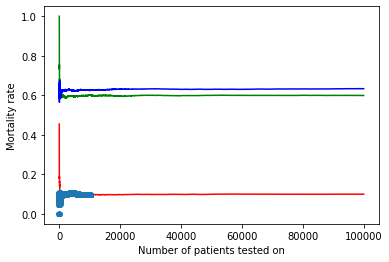

In [0]:
import matplotlib.pyplot as plt
plt.plot(PS_mortality_rate[10:100000], 'g', OG_mortality_rate[10:100000], 'r', EG_mortality_rate[10:100000], 'b', UCB_mortality_rate[10:10000], 'p')
plt.ylabel("Mortality rate")
plt.xlabel("Number of patients tested on")
plt.show